# Ejercicio k-Nearest Neighbor

## App Reviews
En este ejercicio vas a trabajar con una base de datos de reviews de una aplicación. Entre los datos podemos encontrar el texto de la review, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el rating, en función del sentimiento del comentario y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo KNN.

## Importamos las librerías que vamos a utilizar

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Leemos nuestro archivo de entrada `reviews_sentiment`

In [3]:
pd.set_option("max_colwidth", 200)

In [4]:
df = pd.read_csv("data/reviews_sentiment.csv", sep=";")
df

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,"Hola desde hace algo más de un mes me pone sin conexión y no sale nada, antes me funcionaba correctamente.",23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas complicada de usar hay gente cambiandosevpor esevmotivo gracias,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
...,...,...,...,...,...,...,...
252,Muy buena aplicacion,Muy buena genial,3,positive,positive,5,2.814818
253,Buena,Genial,1,positive,positive,5,2.924393
254,Wuau,Genial,1,positive,positive,5,2.924393
255,Muy buena,Genial,1,positive,positive,5,2.924393


Para facilitar el ejercicio, las columnas que utilizaremos serán: wordcount con la cantidad de palabras utilizadas y sentimentValue con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo

Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5

## Rápidas visualizaciones y análisis
Al menos realiza un análisis univariante y representa la distribución del rating. Realiza otras visualizaciones para ver la relación de tus datos.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    257 non-null    object 
 1   Review Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   titleSentiment  231 non-null    object 
 4   textSentiment   257 non-null    object 
 5   Star Rating     257 non-null    int64  
 6   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.2+ KB


In [6]:
df.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


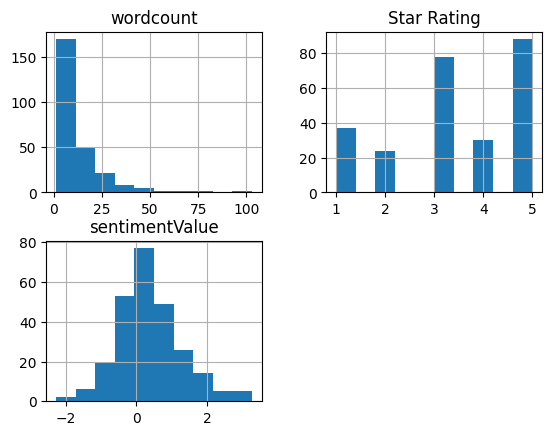

In [7]:
df.hist();

In [8]:
df['Star Rating'].value_counts(normalize=True)

Star Rating
5    0.342412
3    0.303502
1    0.143969
4    0.116732
2    0.093385
Name: proportion, dtype: float64

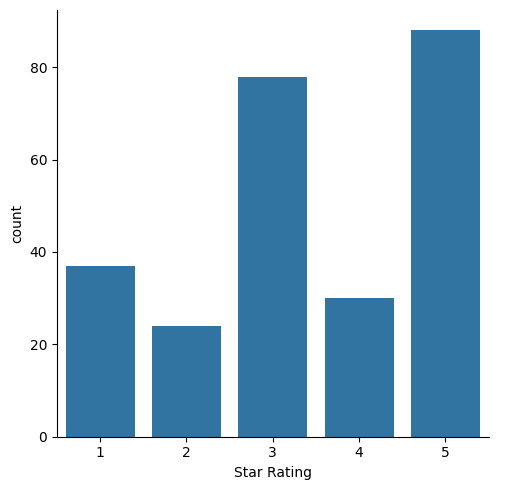

In [9]:
sns.catplot(x="Star Rating", data=df, kind="count")

## Preparamos el dataset
Divide en train/test y escala las features en el rango [0, 1].

In [10]:
from sklearn.model_selection import train_test_split

X = df[['wordcount', 'sentimentValue']]
y = df['Star Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(205, 2)
(52, 2)
(205,)
(52,)


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

print(X_train_scal.min())
print(X_train_scal.max())

print(X_test_scal.min())
print(X_test_scal.max())

0.0
1.0
-0.0982228016602878
0.9325760278023711


In [13]:
# from sklearn.pipeline import Pipeline

# pipe = Pipeline(steps=(
#     ('scaler', MinMaxScaler()),
#     ('classifier', modelo)
# ))

## Creamos el Modelo
Entrena con un KNN y evalúa el error en train y en test

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)


In [16]:
knn.fit(X_train_scal, y_train)

KNeighborsClassifier()

## Evalúa tu modelo

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, multilabel_confusion_matrix, classification_report

In [18]:
y_pred = knn.predict(X_test_scal)
print("accuracy_score", accuracy_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))
print("accuracy_score\n", multilabel_confusion_matrix(y_test, y_pred))

accuracy_score 0.8269230769230769
confusion_matrix
 [[ 9  1  0  0  0]
 [ 0  2  0  0  0]
 [ 2  1 11  0  0]
 [ 0  1  1  3  2]
 [ 0  0  1  0 18]]
accuracy_score
 [[[40  2]
  [ 1  9]]

 [[47  3]
  [ 0  2]]

 [[36  2]
  [ 3 11]]

 [[45  0]
  [ 4  3]]

 [[31  2]
  [ 1 18]]]


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.40      1.00      0.57         2
           3       0.85      0.79      0.81        14
           4       1.00      0.43      0.60         7
           5       0.90      0.95      0.92        19

    accuracy                           0.83        52
   macro avg       0.79      0.81      0.75        52
weighted avg       0.86      0.83      0.82        52



In [20]:
(0.82 * 10 + 0.40 * 2 + 0.85 * 14 + 1.00 * 7 + 0.90 * 19)/52

0.8653846153846154

<Axes: >

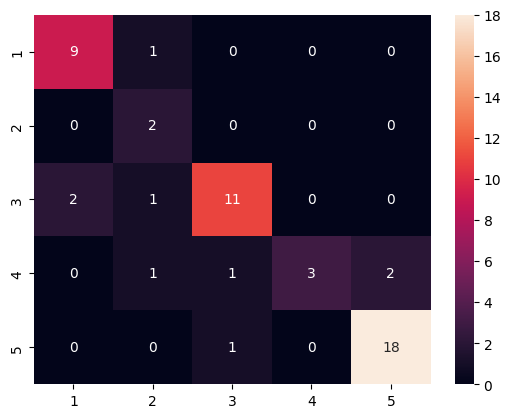

In [21]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])

<Axes: >

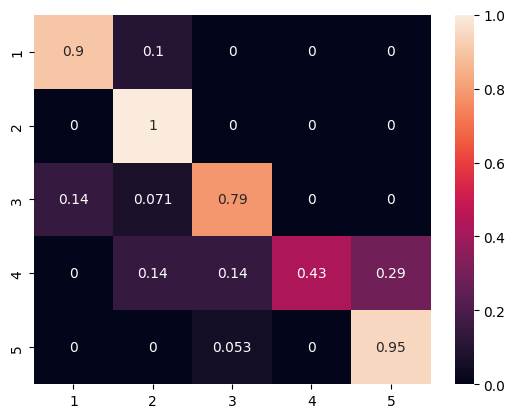

In [22]:
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])

In [23]:
knn.predict(scaler.transform([[16,2],[12,-3]]))

C:\Users\hegoi\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([5, 1])

## ¿Cómo obtener el mejor valor de k? Crea y evalúa nuevos modelos
¿Qué valor de k maximiza el accuracy? Representa todas las iteraciones en un scatterplot -> k vs accuracy

In [24]:
k_range = range(1,30)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scal, y_train)
    scores.append(knn.score(X_test_scal, y_test))

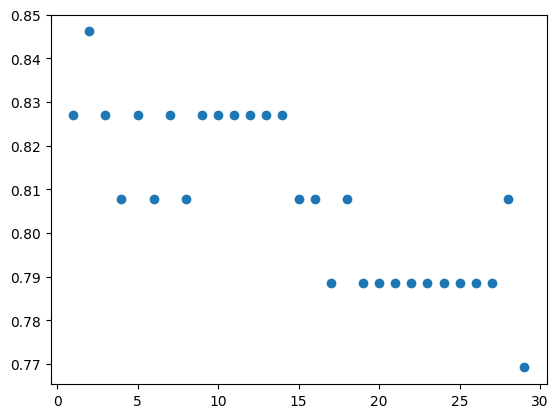

In [25]:
plt.scatter(k_range, scores)

In [26]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scal, y_train)
knn.score(X_test_scal, y_test)

0.8461538461538461

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scal, y_train)
knn.score(X_test_scal, y_test)

0.8269230769230769

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
k_range = range(1,30)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # knn.fit(X_train_scal, y_train)
    results_cv = cross_val_score(knn, X_train_scal, y_train, cv=10)
    scores.append(results_cv.mean())
    # scores.append(knn.score(X_test_scal, y_test))

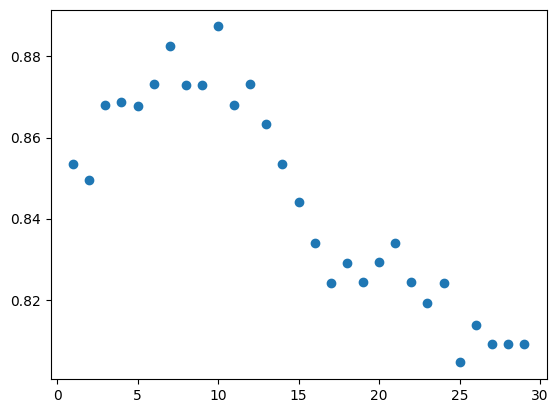

In [30]:
plt.scatter(k_range, scores)

In [31]:
np.argmax(scores) + 1

np.int64(10)

In [32]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()

parameters = {"n_neighbors": range(1,30)}

gs_knn = GridSearchCV(model, parameters, cv=10, scoring="accuracy", n_jobs=-1)

gs_knn.fit(X_train_scal, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 30)}, scoring='accuracy')

In [33]:
print(gs_knn.best_estimator_)
print(gs_knn.best_params_)
print(gs_knn.best_score_)

KNeighborsClassifier(n_neighbors=10)
{'n_neighbors': 10}
0.8873809523809524


In [34]:
final_model = gs_knn.best_estimator_
final_model.fit(X_train_scal, y_train)

print(final_model.score(X_test_scal, y_test))

0.8269230769230769


In [35]:
results_cv = cross_val_score(final_model, scaler.fit_transform(X), y, cv=10, scoring="accuracy")
print(results_cv.mean())

0.8126153846153846


In [36]:
results_cv = cross_val_score(KNeighborsClassifier(n_neighbors=2), scaler.fit_transform(X), y, cv=10, scoring="accuracy")
print(results_cv.mean())

0.7778461538461539


## Predice con nuevos datos.
Ejemplo: supongamos que nos llega una review de 5 palabras y sentimiento 1

In [38]:
final_model.predict(scaler.transform([[5,-2],[5,-1],[5,0],[5,1],[5,2]]))

C:\Users\hegoi\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([1, 1, 3, 5, 5])